# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles 

# Make 1000 examples 
n_samples = 1000
# Create circles 
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features 
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [3]:
# Check the labels
y[:4]

array([1, 1, 1, 1], dtype=int64)

#### Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0": X[:, 0], 'X1': X[:, 1], 'label': y})
circles.head()

X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

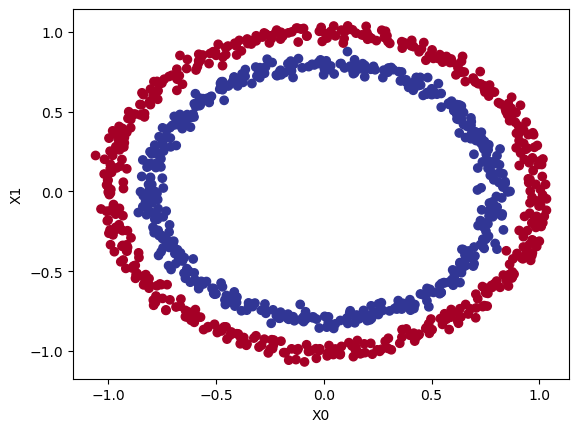

In [5]:
# visualize with a plot 
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### Input and Output shapes

In [6]:
# check the shape of our features and labels 
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels 
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
import tensorflow as tf 
import tensorflow.keras as keras 
from keras import losses, optimizers, layers
 

In [10]:
# 0. Set the seed 
tf.random.set_seed(42)

# 1. Create the model 
model_1 = keras.models.Sequential(
    [
        layers.Dense(1)
    ]
)

# 2. Compile the modle 
model_1.compile(loss=losses.BinaryCrossentropy,
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4891 - loss: 4.4117   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5001 - loss: 3.7288 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 0.7962 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 0.7084 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 0.6949 


In [11]:
# Let's try and improve our model by training for longer..

model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we are working on a binary classification problem and our model is getting around 50% accuray it's performing as it's just guessing randomly

So let's step things up a notch and add another layer.

In [13]:
# set the seeds
tf.random.set_seed(42)

# Create a model, with two layers 
model_2 = keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss=losses.BinaryCrossentropy,
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model 
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model 
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

Still 50% accuracy no good than random guessing.

### Imporving our model 

Let's look into our bag of tricks to see how we can improve oru model.

1. Create a model - we might want to add more layers, more hidden units.
2. Compiling a model - we might want to choose a different optimization function maybe Adam 
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer.)

In [15]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers )
model_3 = keras.Sequential(
    [
        layers.Dense(100),
        layers.Dense(10),
        layers.Dense(1)
    ]
)

# 2. Compile the model 
model_3.compile(
    loss=losses.BinaryCrossentropy,
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# Evaluate the model 
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 0.6914  


[0.6952391266822815, 0.4950000047683716]

**What still aroung 50% accuracy - still random guessing what's happening???**

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X), labels (y)
* Create a meshgrid of the diffrent X values 
* Make predictions across the meshgrid 
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np 
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid 
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(x_in)

    # check for multi-class 
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our prediction to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
 
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


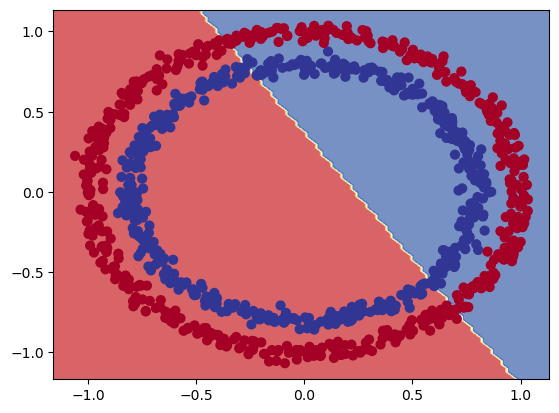

In [18]:
# check out the predictions our model is making 
plot_decision_boundary(model_3, 
                      X, 
                      y)

**OOHHHHH our data is not seperable using straight line we need something curvyyyyyy**

In [25]:
# Let's see if our model can be used for regression problem...

tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


# 1. Create a model (this time 3 layers )
model_3 = keras.Sequential(
    [
        layers.Dense(100),
        layers.Dense(10),
        layers.Dense(1)
    ]
)

# 2. Compile the model 

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(),
    metrics=['mae']
)
# Fit our model to the regression data 
model_3.fit(X_reg_train.numpy().reshape(-1, 1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 652.0045 - mae: 652.0045
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 543.1043 - mae: 543.1043 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 434.8604 - mae: 434.8604 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 325.7754 - mae: 325.7754 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 213.7998 - mae: 213.7998 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.5935 - mae: 97.5935   
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.5818 - mae: 56.5818 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.8036 - mae: 85.8036 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.7321 - mae: 67.7321 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.1425 - mae: 43.1425 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.3176 - mae: 49.3176 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.0241 - mae: 40.0241 
Epoch 13/100
5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


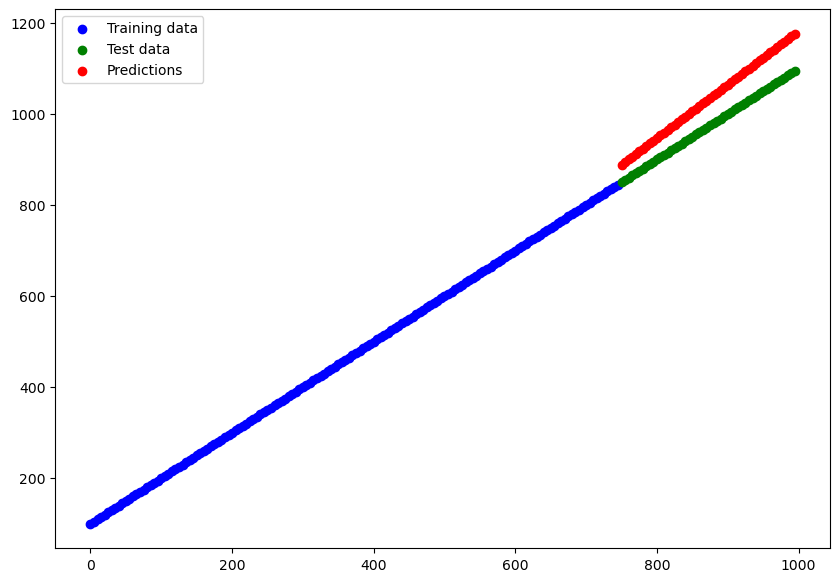

In [26]:
# Make predictions with our trained model 
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predicitons against our regression data 
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

**WOW same model_3 works on regression problem**

### The missing piece: Non-linearity

In [27]:
# set the random seed 
tf.random.set_seed(42)

# 1. Create the model 
model_4 = tf.keras.Sequential([
    layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model 
model_4.compile(loss = 'binary_crossentropy',
               optimizer=keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model 
history = model_4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3987 - loss: 4.8794   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4183 - loss: 4.7993 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4304 - loss: 4.6349 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4297 - loss: 4.5398 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4366 - loss: 4.4833 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4385 - loss: 4.4815 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4431 - loss: 4.4803 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 4.4790 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 4.4777 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 4.4765 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 4.4628 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

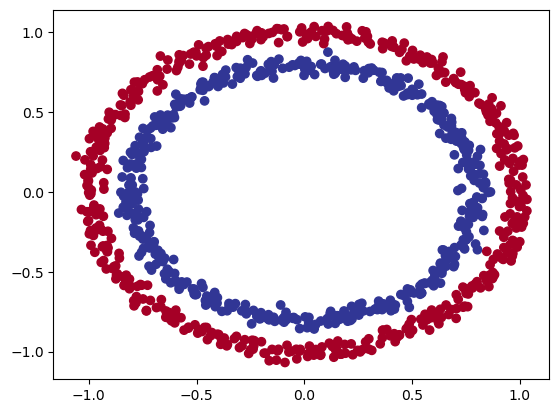

In [28]:
# Check out our data 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
doing binary classification


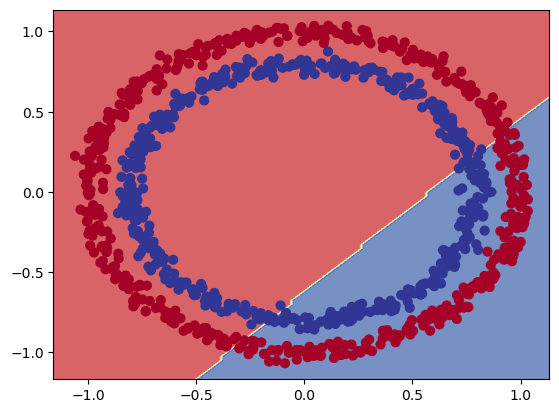

In [30]:
# Check the decision boundary for our latest model 
plot_decision_boundary(model=model_4, 
                      X=X,
                      y=y)

**Let's try build our first neural network with a non-linear activation function.**

In [33]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = keras.Sequential([
    layers.Dense(1, activation='relu')
])

# 2. Compile the model 
model_5.compile(loss=losses.BinaryCrossentropy(),
               optimizer=optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model 
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4976 - loss: 6.2964   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 6.2805 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.2758 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.2755 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2752 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2749 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2746 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2742 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2738 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2733 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2729 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
doing binary classification


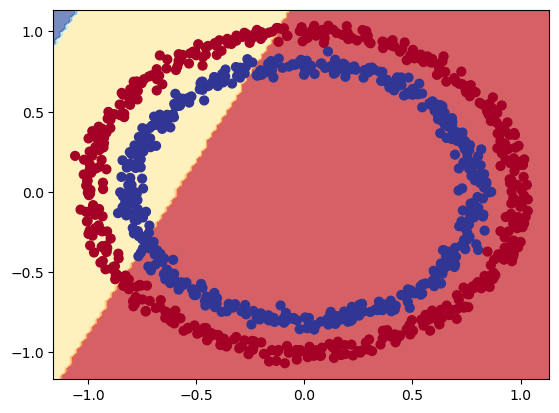

In [34]:
# let's plot decision boundary
plot_decision_boundary(model_5, X, y)

In [42]:
# Time to replicate the multi-layer NN

# set the random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_6 = tf.keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
])

# 2. Compile the model 
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. fit the model 
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4706 - loss: 2.6817
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4774 - loss: 1.2485 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 1.0970 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4735 - loss: 1.0117 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 0.9555 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4598 - loss: 0.9141 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 0.8822 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 0.8554 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4058 - loss: 0.8335 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4125 - loss: 0.8168 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4244 - loss: 0.8030 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [43]:
# Evaluate the model 
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.3156  


[0.31148561835289, 0.9120000004768372]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
doing binary classification


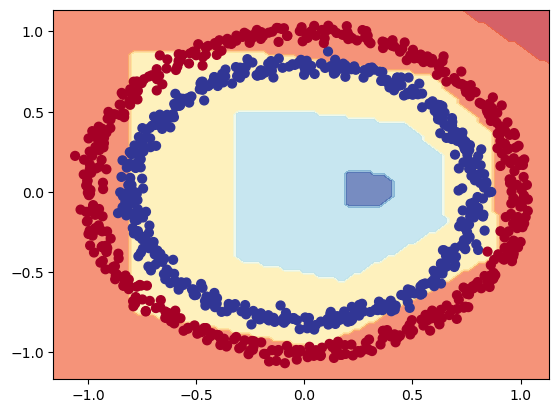

In [44]:
# plot decision boundary
plot_decision_boundary(model_6, X, y)

**Ahh it started capturing the non-linearity in data**

In [45]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model 

model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model 
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4925 - loss: 0.7000
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5132 - loss: 0.6904 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.6854 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 0.6822 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5258 - loss: 0.6801 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 0.6786 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 0.6773 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5459 - loss: 0.6761 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 0.6749 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.6736 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 0.6724 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


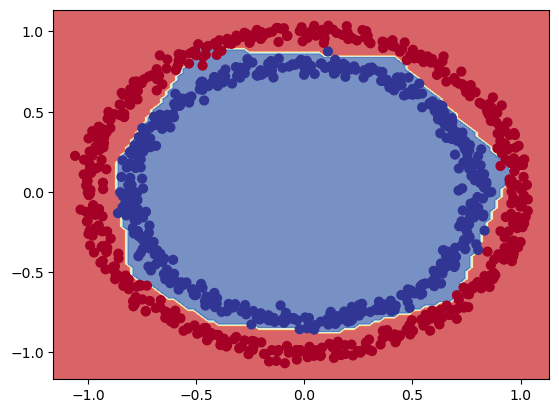

In [46]:
# plot decision boundary
plot_decision_boundary(model_7, X, y)

**Wow accuracy around 97% and it seems the model fits the data well**

In [47]:
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.2210  


[0.2190062254667282, 0.9850000143051147]

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? What data did the model learn on and what data did we predict on? 

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions(or lines), let's see themm in action.

In [48]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

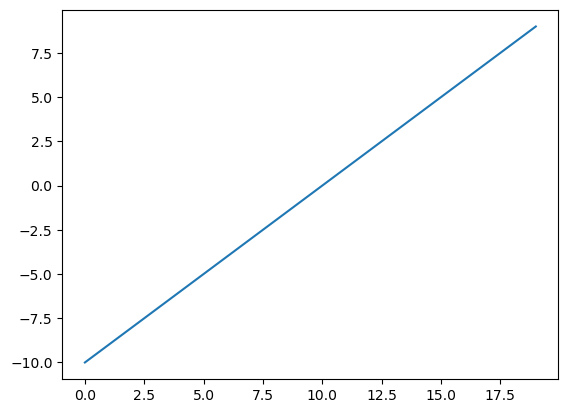

In [49]:
plt.plot(A)

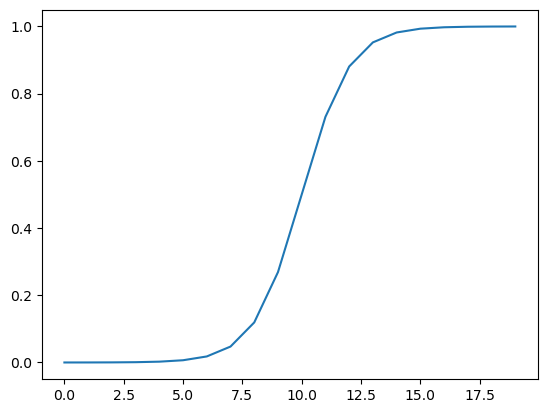

In [50]:
plt.plot(tf.keras.activations.sigmoid(A))

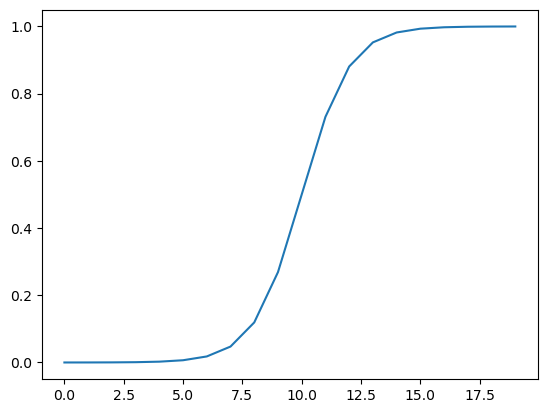

In [52]:

# Let's start by replicating sigmoid 
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(A))

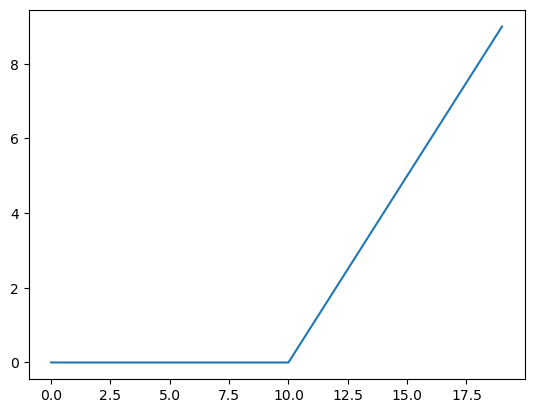

In [55]:
# plot relu 
def relu(x):
    return tf.maximum(0, x)

plt.plot(relu(A))

### Evaluating and improving our classification model 

so far we've been training and testing on the same dataset...

However, in ml this is basically as sin.

so let's create a training and test set.

In [56]:
# Check how many samples we have 
len(X)

1000

In [57]:
# Split into train and test sets 
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [76]:
# Let's recreate a model to fit on the training data and evaluate on testing data
tf.random.set_seed(42)

# 1. Create a model 
model_8 = tf.keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model 
model_8.compile(loss=losses.BinaryCrossentropy(),
               optimizer=optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

# 3. Fit the model 
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4857 - loss: 0.7006
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 0.6831 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6697 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - loss: 0.6522 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6324 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.6058 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7772 - loss: 0.5679 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.5266 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.4886 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.4527 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4191 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [77]:
# 4. Evaluate the model on test set 
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1648  


[0.16627106070518494, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
doing binary classification


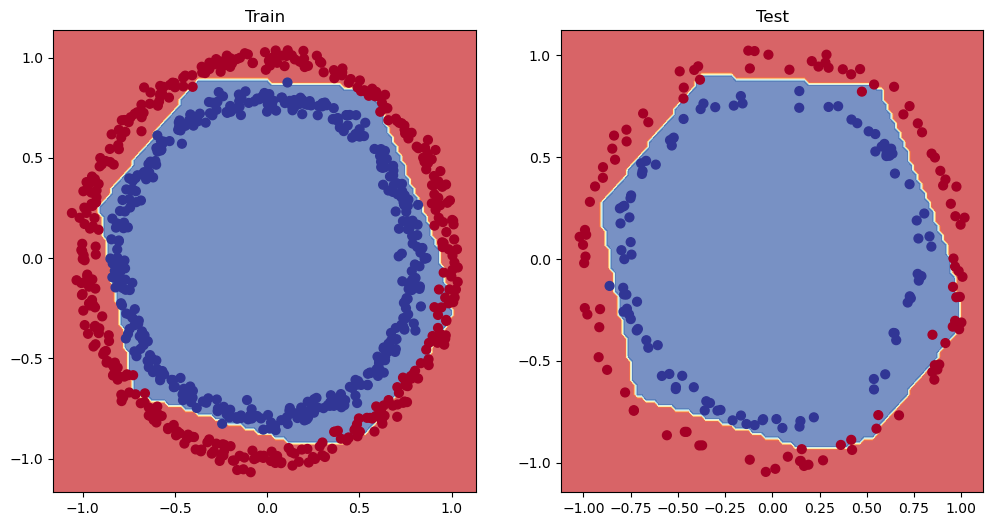

In [78]:
# Plot the decision boundaries for train and test sets 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)

### Plot the loss (or training) curves

In [79]:
pd.DataFrame(history.history)

accuracy      loss
0    0.53000  0.693703
1    0.57375  0.679341
2    0.61875  0.665136
3    0.69000  0.644462
4    0.72500  0.620528
5    0.77750  0.589768
6    0.82375  0.547804
7    0.82875  0.505586
8    0.84000  0.467505
9    0.85125  0.431246
10   0.85625  0.398055
11   0.86250  0.366232
12   0.87000  0.341431
13   0.87625  0.319192
14   0.87750  0.299019
15   0.88000  0.278835
16   0.88500  0.261872
17   0.88750  0.246210
18   0.89875  0.232072
19   0.90500  0.217818
20   0.92500  0.204672
21   0.93250  0.193084
22   0.94250  0.182771
23   0.94625  0.173880
24   0.95250  0.165598

Text(0.5, 1.0, 'Model_8 loss curves')

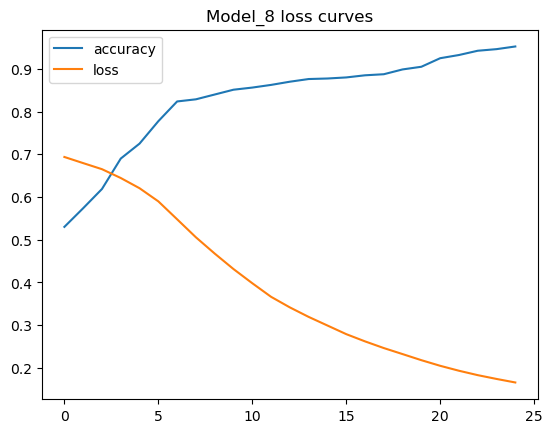

In [80]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

**Note:** For many problems, the loss function going down means the model is improving.

## Finding the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of callback as an extra piecec of functionality, you can dd to you *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.


In [81]:
# set random seed 
tf.random.set_seed(42)

# create a model (same as model_8)
# 1. Create a model 
model_9 = tf.keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model 
model_9.compile(loss=losses.BinaryCrossentropy(),
               optimizer=optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# 3. Fit the model (passing lr_sclr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5069 - loss: 0.7201 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 0.7191 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.7181 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5069 - loss: 0.7170 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.7158 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5075 - loss: 0.7147 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 0.7135 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5122 - loss: 0.7122 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5104 - loss: 0.7110 - learning_

<Axes: xlabel='epochs'>

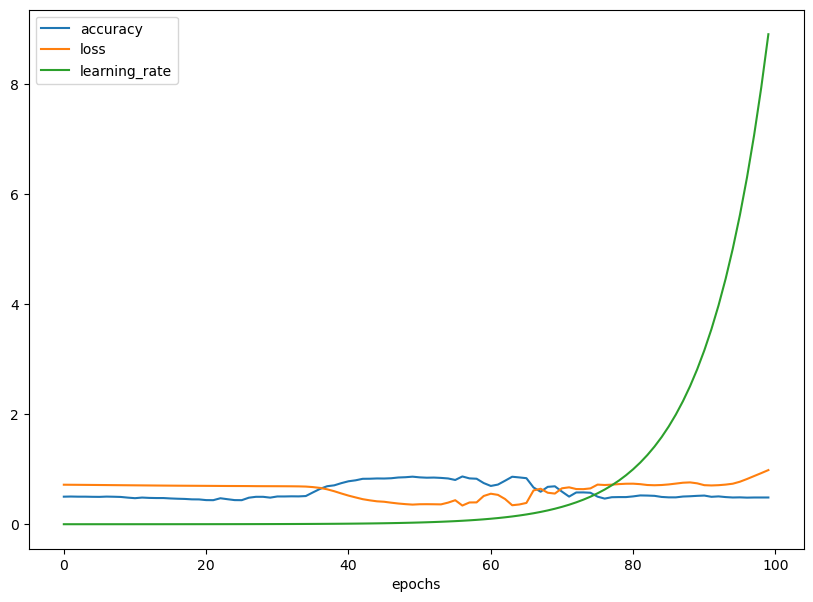

In [82]:
# Check out the history 
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

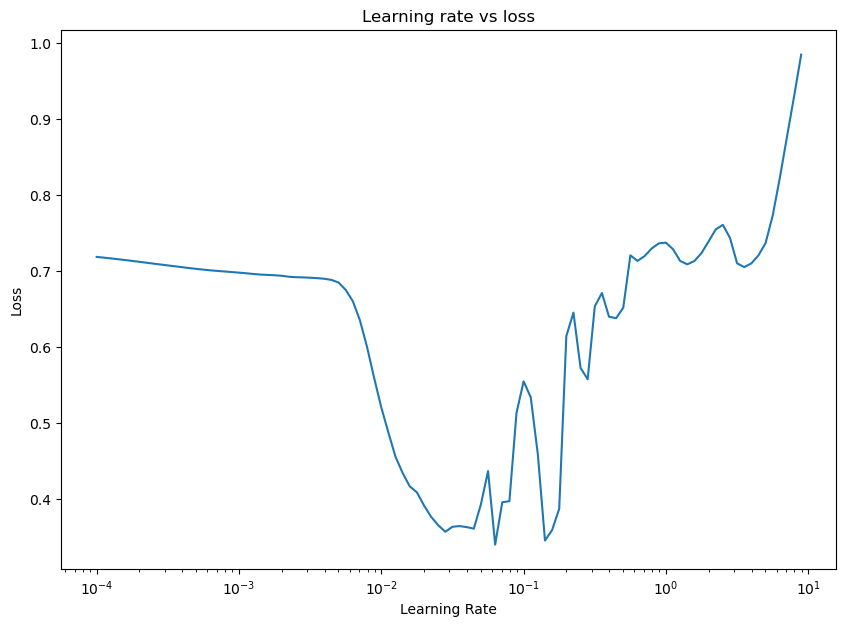

In [83]:
# Plot the learning rate versus the loss 
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title('Learning rate vs loss')


In [84]:
# Example of other typical learning rates values

10**0, 10**-1, 10**-2, 10**-3

(1, 0.1, 0.01, 0.001)

In [89]:
# Let's train our new model with our best learning rate 

# set random seed 
tf.random.set_seed(42)

# create the model 
model_10 = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model 
model_10.compile(loss=losses.BinaryCrossentropy(),
                optimizer=optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# Fit the model for 20 epochs 
history_10 = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: 0.7044
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 0.6918 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5291 - loss: 0.6883 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 0.6806 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6039 - loss: 0.6574 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.6062 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5409 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.4684 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.4043 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.3491 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.3004 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [90]:
# Evaluate model 10 on the test dataset 
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0710  


[0.0713527500629425, 0.9950000047683716]

In [91]:
# Evaluate model 8 on the test dataset 
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1648 


[0.16627106070518494, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
doing binary classification


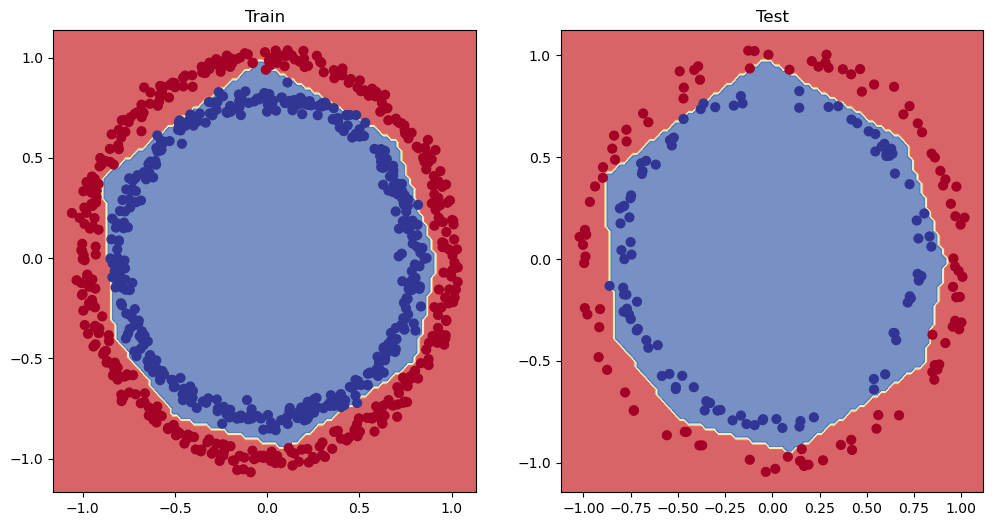

In [92]:
# plot the decision boundaries for training and test sets 
# Plot the decision boundaries for train and test sets 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods 

ALongside visualizing our models results as much as possible, there are handful of other evaluation metrics we should be familier with:
* Accuracy
* Precision - high precision less false positive
* Recall - high recall less false negatives
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [93]:
# check the accuracy of our model 
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0710 
Model loss on the test set: 0.0713527500629425
Model accuracy on the test set: 99.50%


### How about a confusion matrix?

In [99]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_10.predict(X_test)
y_preds = tf.round(y_preds)
# Create confusion matrix 
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[101,   0],
       [  1,  98]], dtype=int64)

How about we prettify our confusion matrix?

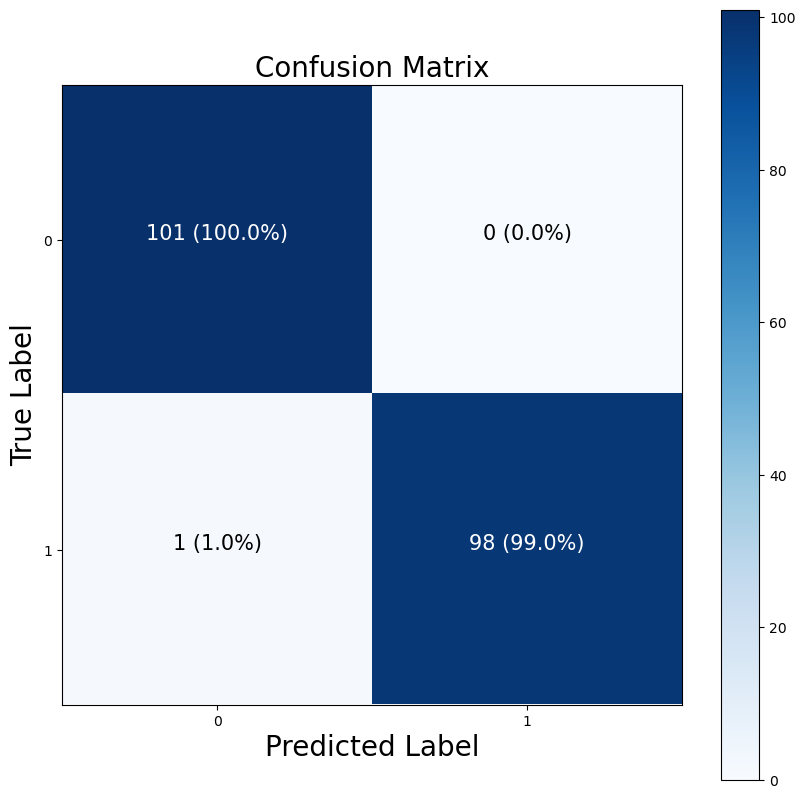

In [102]:
import itertools 

figsize = (10, 10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False 

if classes:
    labels = classes 
else:
    labels = np.arange(cm.shape[0])

# Label the axes 
ax.set(title='Confusion Matrix',
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# SEt x-axis labels to bottom 
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set threshold for different colors 
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=15)